In [71]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [72]:
weak_serial_non_optimized = {
    1: (16.065201, 34752),
    2: (61.957800, 65797),
    3: (133.297970, 95891),
    4: (231.654619, 124944),
    5: (362.703151, 153342),
    6: (524.911656, 181046),
    7: (686.745329, 208468),
    8: (874.541563, 235765),
    9: (1141.083332, 262622),
    10: (1340.448774, 288752)
}

weak_serial_optimized = {
    1: (2.702978, 34752),
    2: (9.496107, 65797),
    3: (20.767548, 95891),
    4: (36.099647, 124944),
    5: (55.470490, 153342),
    6: (78.513791, 181046),
    7: (105.428551, 208468),
    8: (137.555177, 235765),
    9: (170.349835, 262622),
    10: (210.406970, 288752)
}

weak_scaling_optimized = {
    (1, 250): (2.513608, 34752),
    (2, 353): (6.064992, 65797),
    (3, 433): (9.640112, 95897),
    (4, 500): (13.430234, 124947),
    (5, 559): (26.683688, 153351),
    (6, 612): (32.941283, 181064),
    (7, 661): (39.341507, 208495),
    (8, 707): (45.091170, 235800),
    (9, 750): (68.630008, 262666),
    (10, 790): (76.900071, 288802)
}

weak_scaling_non_optimized = {
    (1, 250): (9.081508, 34752),
    (2, 353): (18.886839, 65797),
    (3, 433): (28.756628, 95898),
    (4, 500): (39.590153, 124952),
    (5, 559): (83.708791, 153358),
    (6, 612): (99.464065, 181064),
    (7, 661): (134.063165, 208492),
    (8, 707): (155.751739, 235794),
    (9, 750): (221.847064, 262665),
    (10, 790): (484.157588, 288825)
}


serial_non_optimized = 9.420105
serial_optimized = 1.929857


optimized_strong_scaling = {
    1: (2.593242, 34752),
    2: (1.850676, 34753),
    3: (1.719062, 34754),
    4: (1.739675, 34758),
    5: (1.801178, 34758),
    6: (1.857234, 34768),
    7: (1.853135, 34766),
    8: (1.851814, 34772),
    9: (2.001066, 34781),
    10: (2.063104, 34785)
}

non_optimized_strong_scaling = {
    1: (9.068330, 34752),
    2: (5.211306, 34754),
    3: (4.008389, 34756),
    4: (3.419340, 34760),
    5: (4.621619, 34763),
    6: (4.174248, 34778),
    7: (3.876853, 34774),
    8: (3.333779, 34765),
    9: (4.007979, 34785),
    10: (3.844349, 34769)
}

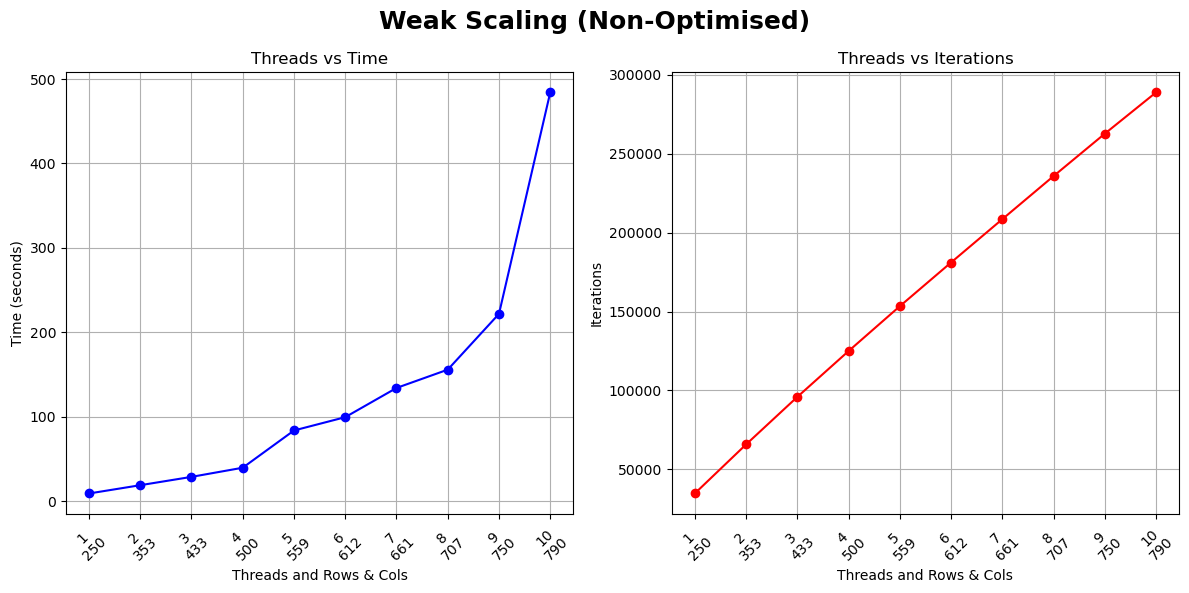

In [73]:
threads = list(weak_scaling_non_optimized.keys())
times = [weak_scaling_non_optimized[thread][0] for thread in threads]
iterations = [weak_scaling_non_optimized[thread][1] for thread in threads]

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(range(len(threads)), times, marker='o', color='b')
plt.title('Threads vs Time')
plt.xlabel('Threads and Rows & Cols')
plt.ylabel('Time (seconds)')
plt.xticks(range(len(threads)), [f"{thread}\n{rows_cols}" for thread, rows_cols in threads], rotation=45)
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(range(len(threads)), iterations, marker='o', color='r')
plt.title('Threads vs Iterations')
plt.xlabel('Threads and Rows & Cols')
plt.ylabel('Iterations')
plt.xticks(range(len(threads)), [f"{thread}\n{rows_cols}" for thread, rows_cols in threads], rotation=45)
plt.grid(True)

plt.suptitle("Weak Scaling (Non-Optimised)", fontsize=18, fontweight='bold')

plt.tight_layout()

plt.show()

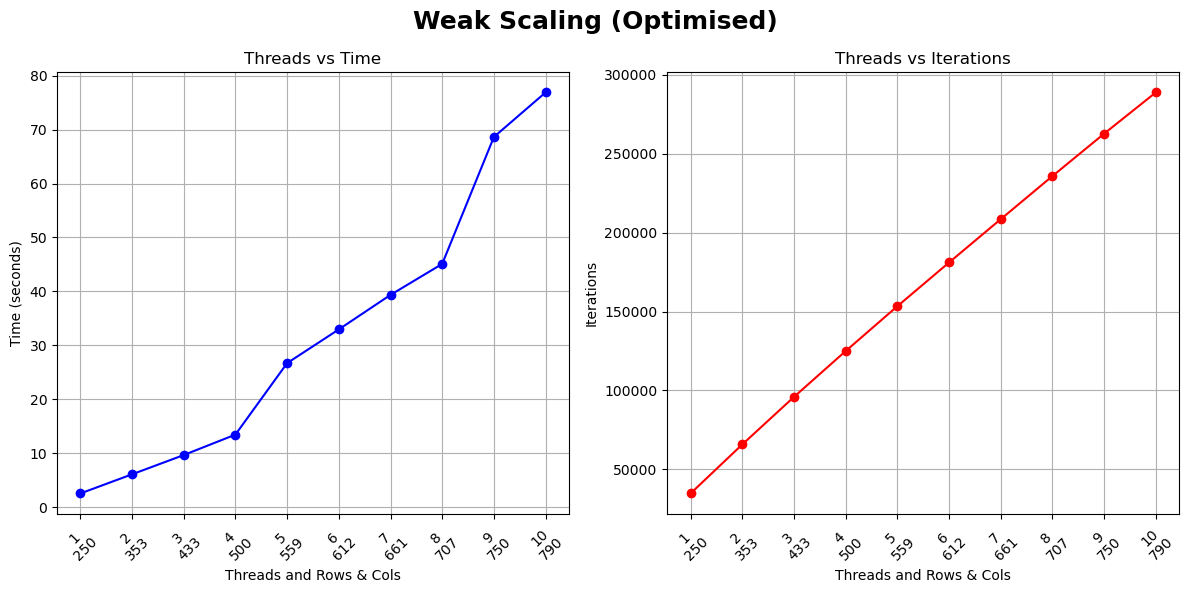

In [74]:
threads = list(weak_scaling_optimized.keys())
times = [weak_scaling_optimized[thread][0] for thread in threads]
iterations = [weak_scaling_optimized[thread][1] for thread in threads]

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(range(len(threads)), times, marker='o', color='b')
plt.title('Threads vs Time')
plt.xlabel('Threads and Rows & Cols')
plt.ylabel('Time (seconds)')
plt.xticks(range(len(threads)), [f"{thread}\n{rows_cols}" for thread, rows_cols in threads], rotation=45)
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(range(len(threads)), iterations, marker='o', color='r')
plt.title('Threads vs Iterations')
plt.xlabel('Threads and Rows & Cols')
plt.ylabel('Iterations')
plt.xticks(range(len(threads)), [f"{thread}\n{rows_cols}" for thread, rows_cols in threads], rotation=45)
plt.grid(True)

plt.suptitle("Weak Scaling (Optimised)", fontsize=18, fontweight='bold')

plt.tight_layout()

plt.show()

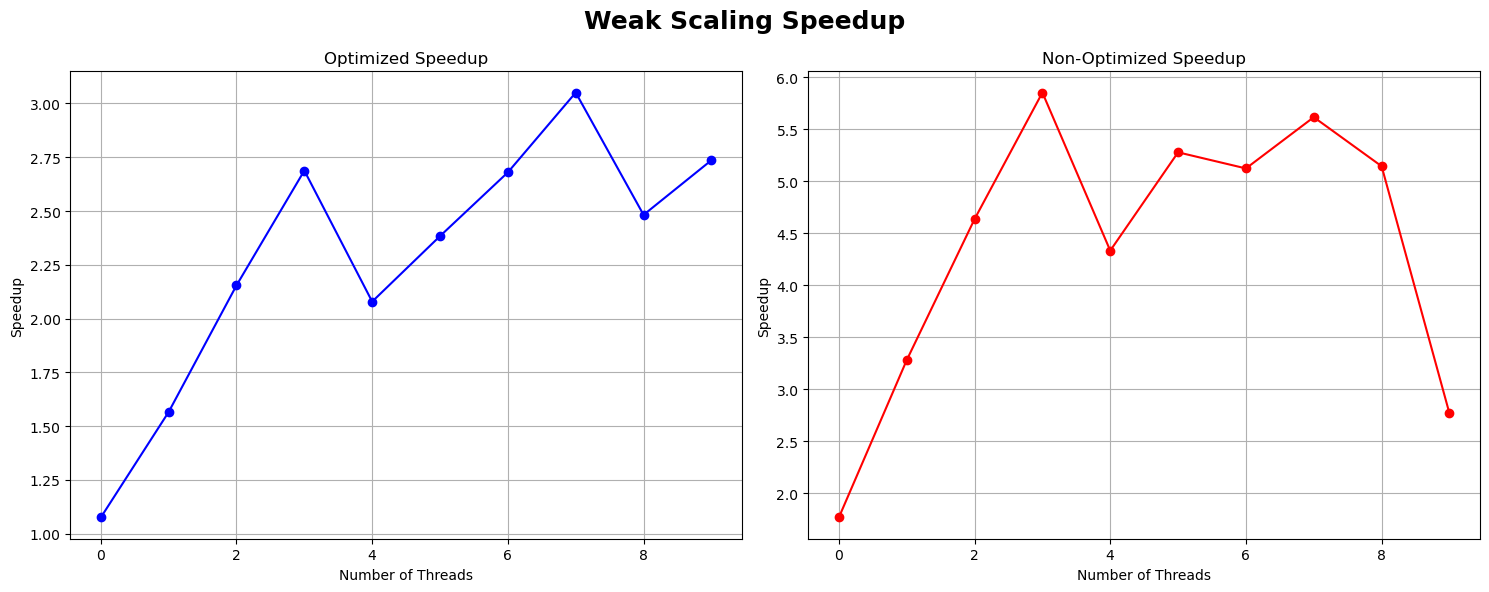

In [75]:
non_optimized_serial_times = list(val[0] for val in weak_serial_non_optimized.values())
optimized_serial_times = list(val[0] for val in weak_serial_optimized.values())

non_optimized_parallel_times = [val[0] for val in weak_scaling_non_optimized.values()]
optimized_parallel_times = [val[0] for val in weak_scaling_optimized.values()]

speedup_non_optimized = [non_optimized_serial_times[i] / non_optimized_parallel_times[i] for i in range(len(non_optimized_serial_times))]
speedup_optimized = [optimized_serial_times[i] / optimized_parallel_times[i] for i in range(len(non_optimized_serial_times))]

# Plotting
plt.figure(figsize=(15, 6))

# Subplot 1: Optimized Speedup
plt.subplot(1, 2, 1)
plt.plot(range(len(non_optimized_serial_times)),speedup_optimized, marker='o', color='b')
plt.title('Optimized Speedup')
plt.xlabel('Number of Threads')
plt.ylabel('Speedup')
plt.grid(True)



# Subplot 2: Non-Optimized Speedup
plt.subplot(1, 2, 2)
plt.plot(range(len(non_optimized_serial_times)), speedup_non_optimized, marker='o', color='r')
plt.title('Non-Optimized Speedup')
plt.xlabel('Number of Threads')
plt.ylabel('Speedup')
plt.grid(True)

plt.suptitle("Weak Scaling Speedup", fontsize=18, fontweight='bold')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

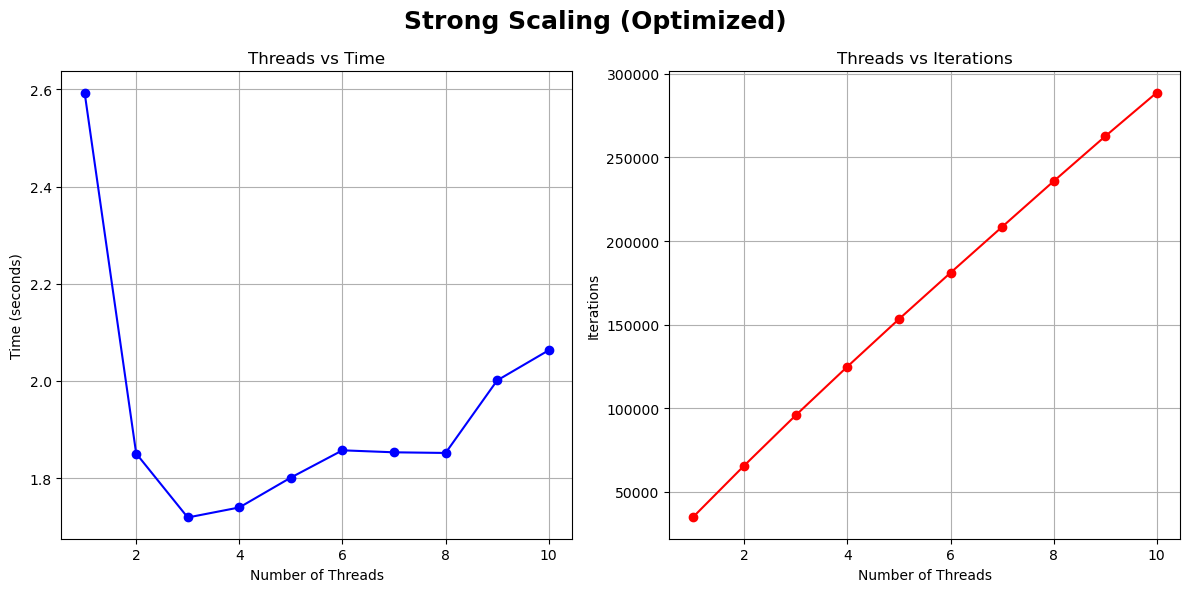

In [76]:
threads = list(optimized_strong_scaling.keys())
times = [optimized_strong_scaling[thread][0] for thread in threads]

# Plotting
plt.figure(figsize=(12, 6))

# Subplot 1: Threads vs Time
plt.subplot(1, 2, 1)
plt.plot(threads, times, marker='o', color='b')
plt.title('Threads vs Time')
plt.xlabel('Number of Threads')
plt.ylabel('Time (seconds)')
plt.grid(True)

# Subplot 2: Threads vs Iterations
plt.subplot(1, 2, 2)
plt.plot(threads, iterations, marker='o', color='r')
plt.title('Threads vs Iterations')
plt.xlabel('Number of Threads')
plt.ylabel('Iterations')

plt.grid(True)

plt.suptitle("Strong Scaling (Optimized)", fontsize=18, fontweight='bold')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

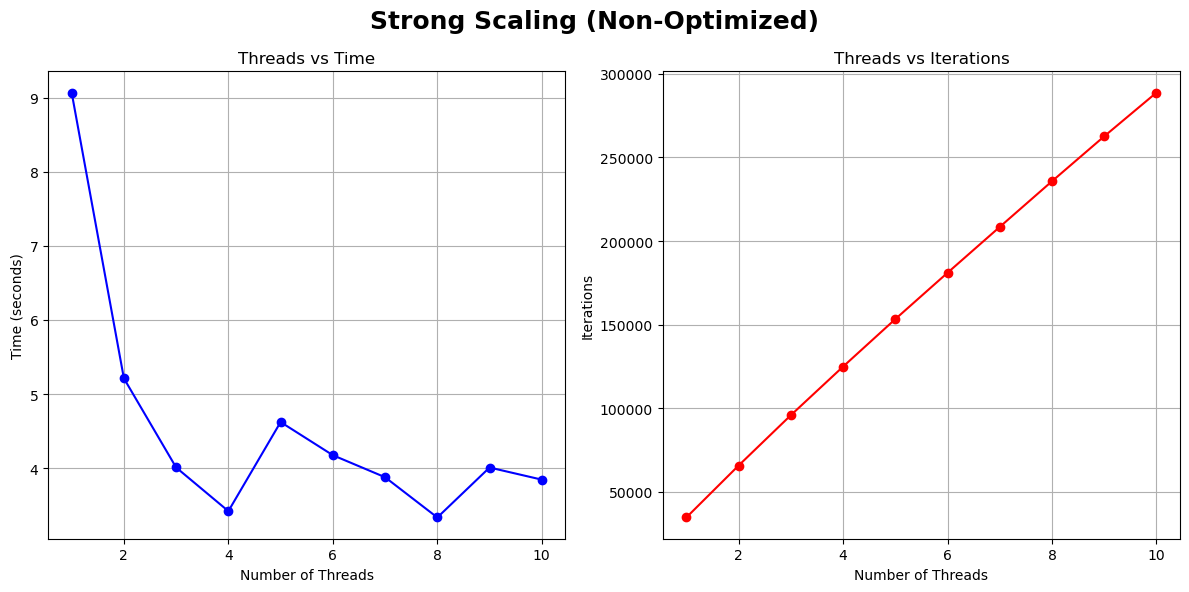

In [80]:
threads = list(non_optimized_strong_scaling.keys())
times = [non_optimized_strong_scaling[thread][0] for thread in threads]

# Plotting
plt.figure(figsize=(12, 6))

# Subplot 1: Threads vs Time
plt.subplot(1, 2, 1)
plt.plot(threads, times, marker='o', color='b')
plt.title('Threads vs Time')
plt.xlabel('Number of Threads')
plt.ylabel('Time (seconds)')
plt.grid(True)

# Subplot 2: Threads vs Iterations
plt.subplot(1, 2, 2)
plt.plot(threads, iterations, marker='o', color='r')
plt.title('Threads vs Iterations')
plt.xlabel('Number of Threads')
plt.ylabel('Iterations')

plt.grid(True)

plt.suptitle("Strong Scaling (Non-Optimized)", fontsize=18, fontweight='bold')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

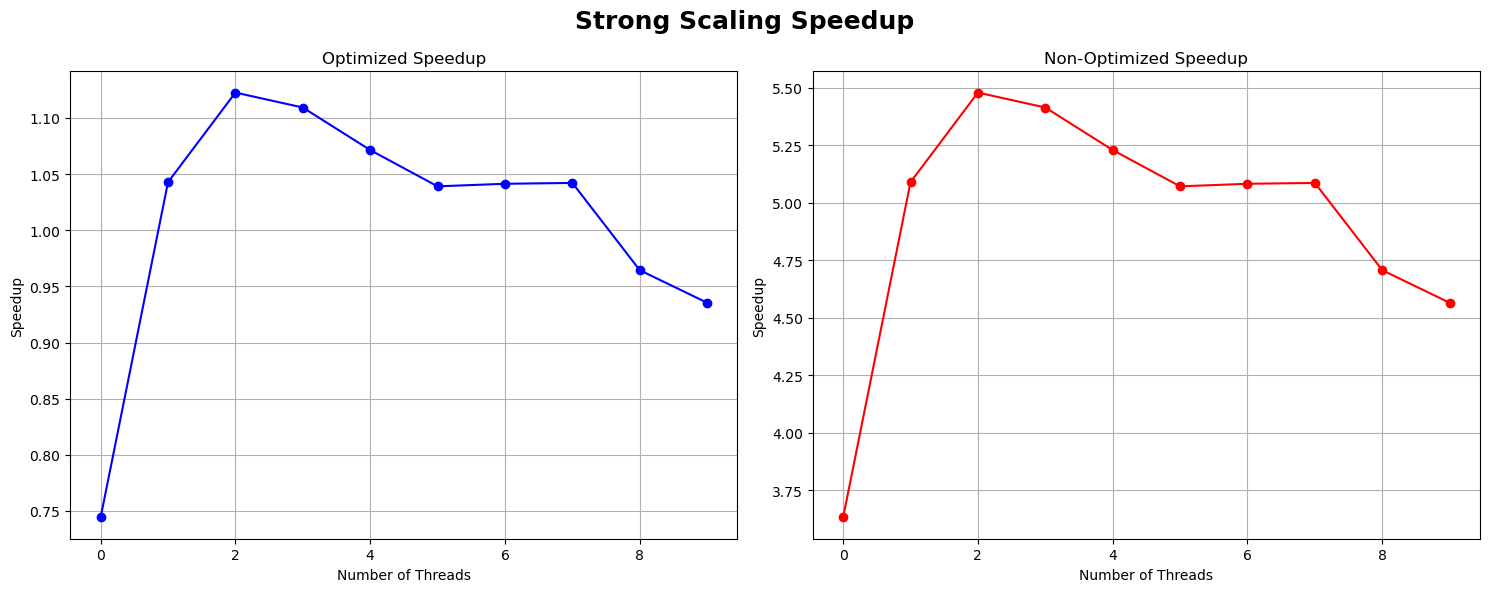

In [81]:
non_optimized_parallel_times = [val[0] for val in strong_scaling.values()]
optimized_parallel_times = [val[0] for val in optimized_strong_scaling.values()]

speedup_non_optimized = [serial_non_optimized / non_optimized_parallel_times[i] for i in range(len(non_optimized_serial_times))]
speedup_optimized = [serial_optimized / optimized_parallel_times[i] for i in range(len(non_optimized_serial_times))]

# Plotting
plt.figure(figsize=(15, 6))

# Subplot 1: Optimized Speedup
plt.subplot(1, 2, 1)
plt.plot(range(len(non_optimized_serial_times)),speedup_optimized, marker='o', color='b')
plt.title('Optimized Speedup')
plt.xlabel('Number of Threads')
plt.ylabel('Speedup')
plt.grid(True)



# Subplot 2: Non-Optimized Speedup
plt.subplot(1, 2, 2)
plt.plot(range(len(non_optimized_serial_times)), speedup_non_optimized, marker='o', color='r')
plt.title('Non-Optimized Speedup')
plt.xlabel('Number of Threads')
plt.ylabel('Speedup')
plt.grid(True)

plt.suptitle("Strong Scaling Speedup", fontsize=18, fontweight='bold')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()